In [1]:
import numpy as np
import os
import skimage.io as skio
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
indir = "G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project"

# set the filepath
patches_path = os.path.join(indir, "patches")

In [2]:
# read in "patches_0.npy"
patches_sample = np.load(os.path.join(patches_path, "patches_0.npy"))

In [5]:
# Calculate the percentage of 255-valued pixels in each image
drop_pixels = (patches_sample == 255).sum(axis=(1, 2, 3))
total_pixels = patches_sample.shape[1] * patches_sample.shape[2] * patches_sample.shape[3]
drop_percentages = drop_pixels / total_pixels

# Set the threshold for filtering images
threshold = 0.05

# Find indices of images with less than 5% 255-valued pixels
valid_indices = np.where(drop_percentages < threshold)[0]

# Filter the array based on valid_indices
filtered_patches = patches_sample[valid_indices]

print("Original array shape:", patches_sample.shape)
print("Filtered array shape:", filtered_patches.shape)

Original array shape: (520, 256, 256, 3)
Filtered array shape: (191, 256, 256, 3)


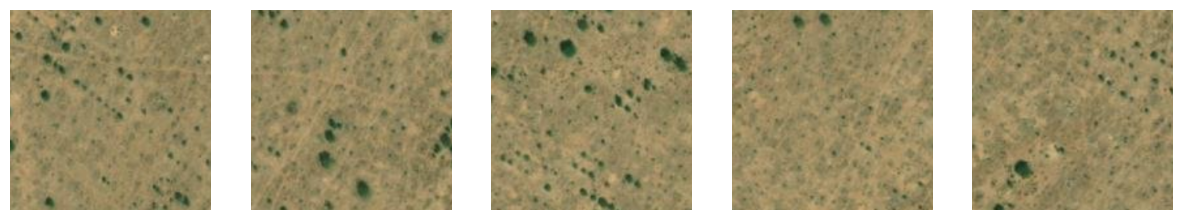

In [6]:
# plot the first 5 patches
fig, ax = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    ax[i].imshow(filtered_patches[i])
    ax[i].axis("off")
plt.show()

In [7]:
# apply k-means clustering to the first 5 patches with k = 3
from sklearn.cluster import KMeans

# reshape the array to 2D
reshaped_patches = filtered_patches.reshape(filtered_patches.shape[0], -1)

# apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(reshaped_patches)

C:\Users\Nissim\Desktop\Spring 2023\Remote Sensing\MUSA-650_Spring2023\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [0]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Get the cluster labels for each image
cluster_labels = kmeans.labels_

# Calculate the cluster centroids as RGB images
centroids = kmeans.cluster_centers_.reshape(-1, filtered_patches.shape[1], filtered_patches.shape[2], filtered_patches.shape[3])

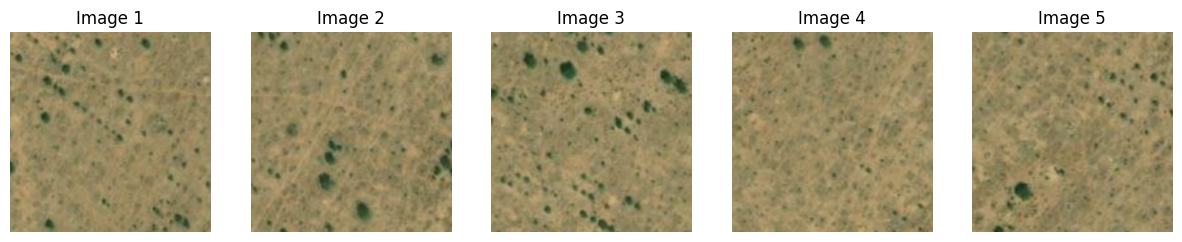

In [19]:
# Visualize the first 5 images
fig, ax = plt.subplots(1, 5, figsize=(15, 6))

for i in range(5):
    # Plot the original image
    ax[i].imshow(filtered_patches[i])
    ax[i].set_title(f'Image {i+1}')
    ax[i].axis("off")

plt.show()

C:\Users\Nissim\Desktop\Spring 2023\Remote Sensing\MUSA-650_Spring2023\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nissim\AppData\Local\Temp\ipykernel_49272\1898599273.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1', 3)


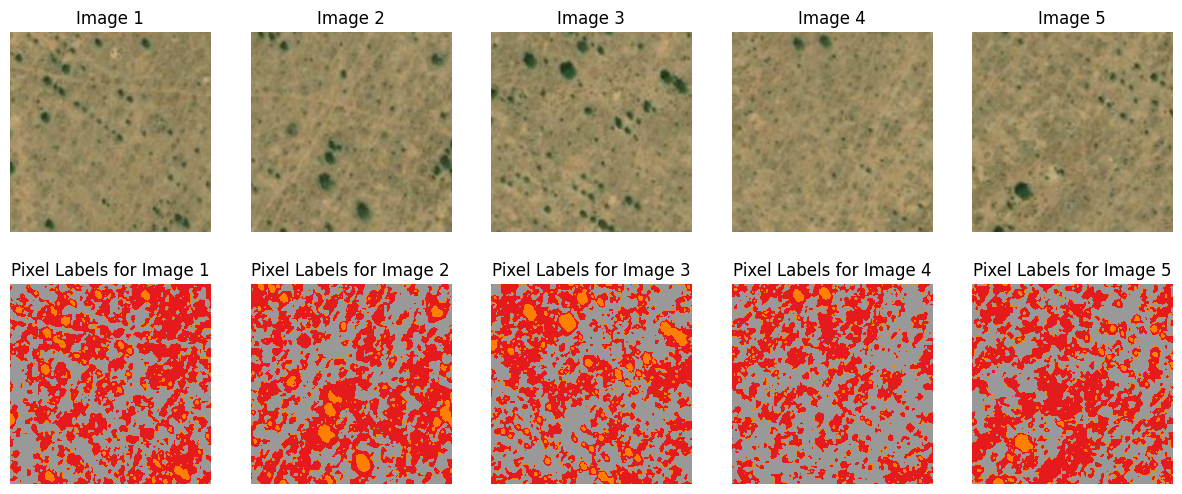

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Reshape the image patches into a 2D array
X = filtered_patches.reshape(-1, filtered_patches.shape[-1])

# Apply k-means clustering to the image patches
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Get the cluster labels for each pixel in the first 5 images
labels = kmeans.labels_.reshape(filtered_patches.shape[:-1])
labels_5 = labels[:5]

# Define the colormap for the pixel labels
cmap = plt.cm.get_cmap('Set1', 3)

# Visualize the pixel labels for the first 5 images
fig, ax = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    # Plot the original image
    ax[0, i].imshow(filtered_patches[i])
    ax[0, i].set_title(f'Image {i+1}')
    ax[0, i].axis("off")

    # Plot the corresponding pixel labels
    ax[1, i].imshow(labels_5[i], cmap=cmap, vmin=0, vmax=2)
    ax[1, i].set_title(f'Pixel Labels for Image {i+1}')
    ax[1, i].axis("off")

plt.show()

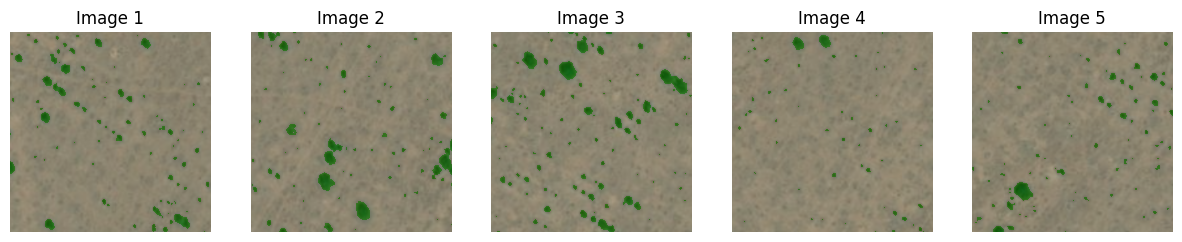

In [26]:
# from the first 5 images, plot only the pixels that belong to cluster 0
fig, ax = plt.subplots(1, 5, figsize=(15, 6))

for i in range(5):
    # Plot the original image
    ax[i].imshow(filtered_patches[i])
    ax[i].set_title(f'Image {i+1}')
    ax[i].axis("off")

    # Plot the corresponding pixel labels
    pixel_labels = np.zeros_like(labels_5[i], dtype=np.uint8)
    pixel_labels[labels_5[i] == 1] = 1
    cmap = ListedColormap(['gray', 'green'])
    ax[i].imshow(pixel_labels, cmap=cmap, alpha=0.5)

plt.show()

In [32]:
import numpy as np

# Initialize lists to store the counts for each class
num_class_zero = [0] * 5
num_class_one = [0] * 5
num_class_two = [0] * 5

for i in range(5):
    num_class_zero[i] = np.sum(labels_5[i] == 0)
    num_class_one[i] = np.sum(labels_5[i] == 1)
    num_class_two[i] = np.sum(labels_5[i] == 2)

# Print the counts for each class
print("Counts of class 0:", num_class_zero)
print("Counts of class 1:", num_class_one)
print("Counts of class 2:", num_class_two)

Counts of class 0: [32843, 33124, 28882, 26773, 32123]
Counts of class 1: [2381, 2929, 3753, 826, 1761]
Counts of class 2: [30312, 29483, 32901, 37937, 31652]


In [33]:
labels_5_modified = [label_array.astype(int) * (label_array == 1) for label_array in labels_5]

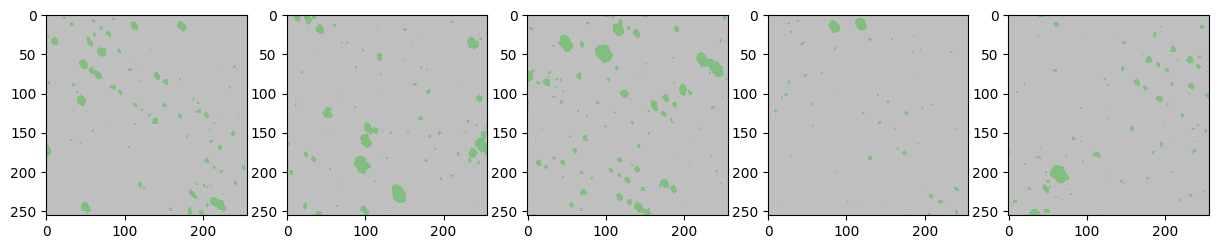

In [35]:
# from the first 5 images, plot only the pixels that belong to cluster 0
fig, ax = plt.subplots(1, 5, figsize=(15, 6))

for i in range(5):
    # Plot the corresponding pixel labels
    pixel_labels = np.zeros_like(labels_5_modified[i], dtype=np.uint8)
    pixel_labels[labels_5_modified[i] == 1] = 1
    cmap = ListedColormap(['gray', 'green'])
    ax[i].imshow(pixel_labels, cmap=cmap, alpha=0.5)

plt.show()

In [37]:
labels_5_modified[i].shape

(256, 256)

In [38]:
import cv2

# Loop over the label images and apply contouring
for i in range(len(labels_5_modified)):
    # Apply binary thresholding to create a binary image
    ret, thresh = cv2.threshold(labels_5_modified[i], 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on a copy of the original image
    img_contours = cv2.drawContours(labels_5_modified[i].copy(), contours, -1, (0, 255, 0), 2)

    # Replace the original label image with the contour image
    labels_5_modified[i] = img_contours

ModuleNotFoundError: No module named 'cv2'

In [30]:
import pandas as pd
import numpy as np

# Define a function to count the size of each pixel cluster in an image
def count_pixel_clusters(image, labels):
    """Returns a list of dictionaries containing the cluster number and size for each pixel cluster in the image."""
    cluster_sizes = {}
    for i in range(max(labels) + 1):
        mask = (labels == i)
        cluster_size = np.sum(mask)
        if cluster_size > 0:
            cluster_sizes[i] = cluster_size
    return [{'Cluster': k, 'Size': v} for k, v in cluster_sizes.items()]

# Count the size of each pixel cluster in the first 5 images
results = []
for i in range(5):
    image = filtered_patches[i]
    image_labels = labels[i]
    clusters = count_pixel_clusters(image, image_labels)
    for cluster in clusters:
        cluster['Image'] = f'Image {i+1}'
    results.extend(clusters)

# Convert the results to a pandas dataframe
df = pd.DataFrame(results, columns=['Image', 'Cluster', 'Size'])
print(df)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()